In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
training_data = pd.read_csv("data\Train.csv")
testing_data = pd.read_csv("data\Test.csv")

In [3]:
print(training_data.head())
print(testing_data.head())

    Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.7116

In [4]:
#training_data.info()

# Data Exploration 

In [5]:
training_data.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [6]:
print('The number of rows in train dataset is - ' , training_data.shape[0])
print('The number of columns in train dataset is - ' , training_data.shape[1])

The number of rows in train dataset is -  56000
The number of columns in train dataset is -  52


In [7]:
print('The number of rows in test dataset is - ' , testing_data.shape[0])
print('The number of columns in test dataset is - ' , testing_data.shape[1])

The number of rows in test dataset is -  24000
The number of columns in test dataset is -  51


In [8]:
''' #               MISSING DATA '''
#checking missing values percentage
training_data_na = (training_data.isnull().sum() / len(training_data)) * 100
training_data_na = training_data_na.drop(training_data_na[training_data_na ==0].index).sort_values(ascending=False)
missing_data1 = pd.DataFrame({'Missing Ratio' :training_data_na})
#print('training_data missing_data in percent: \n', missing_data1)

In [9]:
''' #               MISSING DATA '''
#checking missing values percentage
testing_data_na = (testing_data.isnull().sum() / len(testing_data)) * 100
testing_data_na = testing_data_na.drop(testing_data_na[testing_data_na ==0].index).sort_values(ascending=False)
missing_data2 = pd.DataFrame({'Missing Ratio' :testing_data_na})
print('testing_data missing_data in percent: \n', missing_data2)

testing_data missing_data in percent: 
               Missing Ratio
form_field40      78.450000
form_field31      70.041667
form_field41      68.120833
form_field45      56.408333
form_field11      55.825000
form_field23      50.520833
form_field30      45.450000
form_field35      41.108333
form_field15      39.966667
form_field48      37.175000
form_field22      36.350000
form_field46      28.687500
form_field21      27.945833
form_field24      23.354167
form_field8       23.350000
form_field6       23.350000
form_field16      22.808333
form_field50      19.987500
form_field17      19.562500
form_field18      18.204167
form_field12      17.429167
form_field27      16.291667
form_field9       14.166667
form_field26      13.216667
form_field13      10.262500
form_field44       9.841667
form_field25       9.400000
form_field37       9.400000
form_field32       9.400000
form_field7        9.295833
form_field39       7.620833
form_field2        7.120833
form_field1        4.625000
form_fie

#### removing features from training_data with missing values greater than 50 percent

training_data_na = (training_data.isnull().sum() / len(training_data)) * 100
#training_data_na = training_data_na.drop(training_data_na[training_data_na >50].index).sort_values(ascending=False)
miss_f = training_data_na[training_data_na>70].index
missing_data1 = pd.DataFrame({'Missing Ratio' :miss_f})
print('training_data columns with 70% missing_values: \n', missing_data1)

testing_data_na = (testing_data.isnull().sum() / len(testing_data)) * 100
#training_data_na = training_data_na.drop(training_data_na[training_data_na >50].index).sort_values(ascending=False)
miss_f2 = testing_data_na[testing_data_na>70].index
missing_data2 = pd.DataFrame({'Missing Ratio' :miss_f2})
print('testing_data columns with 70% missing_values: \n', missing_data2)

#training_data = training_data.drop(["form_field40","form_field31"],axis=1, inplace=True)
training_data = training_data.drop(miss_f, axis=1)#, inplace=True)

testing_data = testing_data.drop(miss_f, axis=1)#, inplace=True)

In [10]:
print(training_data.shape)
print(testing_data.shape)

(56000, 52)
(24000, 51)


### looking into each other columns with missing values too

In [11]:
#print(training_data.columns)
#print(testing_data.columns)

### filling all missing values with the mean of their columns

In [12]:
training_data = training_data.fillna(-99999)
testing_data = testing_data.fillna(-99999)

In [13]:
#checking missing values percentage
training_data_na = (training_data.isnull().sum() / len(training_data)) * 100
training_data_na = training_data_na.drop(training_data_na[training_data_na ==0].index).sort_values(ascending=False)
missing_data1 = pd.DataFrame({'Missing Ratio' :training_data_na})
print('training_data missing_data in percent: \n', missing_data1)

training_data missing_data in percent: 
 Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [14]:
#checking missing values percentage
testing_data_na = (testing_data.isnull().sum() / len(testing_data)) * 100
testing_data_na = testing_data_na.drop(testing_data_na[testing_data_na ==0].index).sort_values(ascending=False)
missing_data2 = pd.DataFrame({'Missing Ratio' :testing_data_na})
print('training_data missing_data in percent: \n', missing_data2)

training_data missing_data in percent: 
 Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [15]:
#Extracting categorical features
categorical_features = training_data.select_dtypes(include=[object])
print('columns of categorical_features.columns',categorical_features.columns)
#print(categorical_features.describe())

columns of categorical_features.columns Index(['Applicant_ID', 'form_field47', 'default_status'], dtype='object')


In [16]:
#Extracting categorical features
categorical_features2 = testing_data.select_dtypes(include=[object])
print('columns of categorical_features2.columns',categorical_features2.columns)
#print(categorical_features2.describe())

columns of categorical_features2.columns Index(['Applicant_ID', 'form_field47'], dtype='object')


### converting the categorical features to numeric using get dummies

In [17]:
training_data["form_field47"]= pd.get_dummies(training_data['form_field47'],drop_first=True)
training_data["default_status"]= pd.get_dummies(training_data['default_status'],drop_first=True)

testing_data["form_field47"]= pd.get_dummies(testing_data['form_field47'],drop_first=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
training_data

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,0,-99999.000000,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,-99999.0,0.0,0,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,-99999.0,956940.0,-99999.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,0,-99999.000000,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,-99999.0,0.0,0,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,0.000000,9.09,0.730040,-99999.0,0.0,1,591.048913,0.000000,0.241598,0
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,-99999.0,927765.0,-99999.0,-99999.0,...,0.297913,30.30,0.498208,-99999.0,0.0,1,-99999.000000,0.000000,-99999.000000,1
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,0.550000,3.03,0.450512,0.0,0.0,1,1252.474467,2.000000,0.163153,0
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,-99999.0,3458599.0,-99999.0,115533.0,...,0.942854,0.00,0.705048,1.0,0.0,0,-99999.000000,0.000000,0.002997,0


In [20]:
testing_data

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0000,418564.0,418564.0,418564.0,540710.0,...,-99999.0000,0.825000,1.01,0.800000,-99999.0,0.0,0,-99999.000000,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0000,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,1,-99999.000000,0.504974,0.043525
2,Apcnt_1000052,-99999.0,0.27505,0.0600,0.0000,0.0000,-99999.0,-99999.0,-99999.0,-99999.0,...,-99999.0000,-99999.000000,0.00,-99999.000000,-99999.0,-99999.0,0,-99999.000000,0.000000,-99999.000000
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0000,0.0,473802.0,473802.0,1724437.0,...,-99999.0000,0.916663,2.02,0.464224,-99999.0,-99999.0,0,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0000,19839.0,1150662.0,1150662.0,7860523.0,...,-99999.0000,0.234047,23.23,0.726688,0.0,0.0,1,1303.587148,1.637733,0.163124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Apcnt_999940,3258.0,0.37925,0.5698,5.1282,0.0000,-99999.0,2280318.0,-99999.0,-99999.0,...,92.6910,1.100000,0.00,0.800000,-99999.0,1.0,0,-99999.000000,0.000000,-99999.000000
23996,Apcnt_999956,3514.0,0.95260,0.0000,0.0000,0.0000,1494538.0,4773419.0,4773419.0,89718571.0,...,125.0220,0.000000,12.12,0.196400,0.0,0.0,0,4200.072959,3.000000,0.930931
23997,Apcnt_999976,3302.0,0.05755,4.2394,0.0000,25.4376,-99999.0,49403.0,-99999.0,-99999.0,...,-99999.0000,1.100000,1.01,0.800000,-99999.0,0.0,0,-99999.000000,4.855060,-99999.000000
23998,Apcnt_999984,3334.0,0.75670,1.4428,0.0000,0.0000,0.0,2513329.0,37733.0,393668.0,...,31.1955,0.440000,2.02,0.519776,-99999.0,0.0,0,27.325129,0.818733,0.023749


### dropping the target feature and applicant id from the training data set

In [21]:
train_target = training_data["default_status"]
training_dat = training_data.drop(["Applicant_ID","default_status"],axis=1)

test_applicant_ID = testing_data["Applicant_ID"]
testing_data = testing_data.drop(["Applicant_ID"],axis=1)

In [22]:
train_target.value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [23]:
print(training_dat.shape)
print(testing_data.shape)

(56000, 50)
(24000, 50)


### some visualization

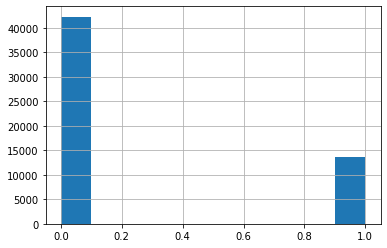

In [24]:
train_target.hist()

In [25]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

### Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(training_dat, 40))

In [26]:
from sklearn.model_selection import train_test_split
seed = 14
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(training_dat, train_target, test_size=test_size, random_state=seed)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

# Model Implementation

We will be looking at following Algorithms 

logistic regression 
Naive Bayes
Stochastic Gradient Descent
KNearest Neighbours
Decision Tree
Random Forest
Support vector machine 

**Ensmble models**

5.Random Forest classifier

6.Gradient Boosting classifier

7.ExtraTrees classifier

**Neural Network**

8.Multi Layer Preceptron Regressor


In [37]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostRegressor
from lightgbm import LGBMClassifier

models = [
    ['LinearRegression:',LogisticRegression()],
    ['SGDClassifier: ', SGDClassifier()],
    ['GaussianNB: ', GaussianNB()],
    ['KNeighboursClassifier: ',  KNeighborsClassifier()],
    ['SVC:' , SVC(kernel='rbf')],
    ['RandomForest ',RandomForestClassifier()],
    ['ExtraTreesClassifier :',ExtraTreesClassifier()],
    ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
    ['XGBClassifier: ', xgb.XGBClassifier()] ,
    ['Catboost: ', CatBoostRegressor(iterations=2,learning_rate=1,depth=2)],
    ['MLPClassifier: ', MLPClassifier(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [67]:
models = [
    ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
#    ['XGBClassifier: ', xgb.XGBClassifier()] ,
    ['lightgbm', LGBMClassifier()],
    ['Catboost: ', CatBoostRegressor()] 
         ]

In [68]:
import time
from math import sqrt
#from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [69]:
#### Run all the proposed models and update the information in a list model_data

#print(confusion_matrix(y_test, y_xg2))


model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_n,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    #curr_model_data["accuracy_score"] = accuracy_score(train_y,curr_model.predict(train_X))
    curr_model_data["accuracy_score"] = accuracy_score(y_test,curr_model.predict(X_test_n).round())
    curr_model_data["precision_score"] = precision_score(y_test,curr_model.predict(X_test_n).round())
    curr_model_data["recall_score"] = recall_score(y_test, curr_model.predict(X_test_n).round())
    curr_model_data["f1_score"] = f1_score(y_test, curr_model.predict(X_test_n).round())
    curr_model_data["roc_auc_score"] = roc_auc_score(y_test, curr_model.predict(X_test_n).round())
    model_data.append(curr_model_data)
print(model_data)

Learning rate set to 0.076794
0:	learn: 0.4233894	total: 39.8ms	remaining: 39.7s
1:	learn: 0.4171842	total: 70.4ms	remaining: 35.1s
2:	learn: 0.4119808	total: 99.1ms	remaining: 32.9s
3:	learn: 0.4070392	total: 125ms	remaining: 31s
4:	learn: 0.4029571	total: 150ms	remaining: 29.8s
5:	learn: 0.3992228	total: 175ms	remaining: 29s
6:	learn: 0.3961400	total: 210ms	remaining: 29.7s
7:	learn: 0.3932634	total: 235ms	remaining: 29.2s
8:	learn: 0.3907161	total: 260ms	remaining: 28.6s
9:	learn: 0.3886292	total: 291ms	remaining: 28.8s
10:	learn: 0.3865619	total: 317ms	remaining: 28.5s
11:	learn: 0.3846972	total: 340ms	remaining: 28s
12:	learn: 0.3830195	total: 363ms	remaining: 27.6s
13:	learn: 0.3815364	total: 397ms	remaining: 28s
14:	learn: 0.3800264	total: 423ms	remaining: 27.8s
15:	learn: 0.3789084	total: 446ms	remaining: 27.4s
16:	learn: 0.3777467	total: 468ms	remaining: 27.1s
17:	learn: 0.3767706	total: 492ms	remaining: 26.9s
18:	learn: 0.3757894	total: 515ms	remaining: 26.6s
19:	learn: 0.374

162:	learn: 0.3550810	total: 4.24s	remaining: 21.7s
163:	learn: 0.3550152	total: 4.26s	remaining: 21.7s
164:	learn: 0.3549340	total: 4.29s	remaining: 21.7s
165:	learn: 0.3548786	total: 4.31s	remaining: 21.6s
166:	learn: 0.3548107	total: 4.33s	remaining: 21.6s
167:	learn: 0.3547322	total: 4.35s	remaining: 21.6s
168:	learn: 0.3546568	total: 4.38s	remaining: 21.5s
169:	learn: 0.3545955	total: 4.41s	remaining: 21.5s
170:	learn: 0.3545047	total: 4.46s	remaining: 21.6s
171:	learn: 0.3544222	total: 4.49s	remaining: 21.6s
172:	learn: 0.3543409	total: 4.52s	remaining: 21.6s
173:	learn: 0.3542798	total: 4.58s	remaining: 21.7s
174:	learn: 0.3542201	total: 4.61s	remaining: 21.7s
175:	learn: 0.3541438	total: 4.64s	remaining: 21.7s
176:	learn: 0.3540618	total: 4.67s	remaining: 21.7s
177:	learn: 0.3539797	total: 4.7s	remaining: 21.7s
178:	learn: 0.3538694	total: 4.74s	remaining: 21.7s
179:	learn: 0.3537773	total: 4.76s	remaining: 21.7s
180:	learn: 0.3536957	total: 4.8s	remaining: 21.7s
181:	learn: 0.

325:	learn: 0.3447071	total: 9.28s	remaining: 19.2s
326:	learn: 0.3446531	total: 9.31s	remaining: 19.2s
327:	learn: 0.3446052	total: 9.34s	remaining: 19.1s
328:	learn: 0.3445347	total: 9.37s	remaining: 19.1s
329:	learn: 0.3444555	total: 9.4s	remaining: 19.1s
330:	learn: 0.3443792	total: 9.43s	remaining: 19.1s
331:	learn: 0.3443243	total: 9.46s	remaining: 19s
332:	learn: 0.3442801	total: 9.48s	remaining: 19s
333:	learn: 0.3442183	total: 9.51s	remaining: 19s
334:	learn: 0.3441765	total: 9.53s	remaining: 18.9s
335:	learn: 0.3441176	total: 9.55s	remaining: 18.9s
336:	learn: 0.3440740	total: 9.57s	remaining: 18.8s
337:	learn: 0.3440163	total: 9.6s	remaining: 18.8s
338:	learn: 0.3439562	total: 9.62s	remaining: 18.8s
339:	learn: 0.3439021	total: 9.65s	remaining: 18.7s
340:	learn: 0.3438536	total: 9.67s	remaining: 18.7s
341:	learn: 0.3438066	total: 9.69s	remaining: 18.6s
342:	learn: 0.3437588	total: 9.72s	remaining: 18.6s
343:	learn: 0.3437071	total: 9.75s	remaining: 18.6s
344:	learn: 0.343679

485:	learn: 0.3362479	total: 13.2s	remaining: 14s
486:	learn: 0.3362166	total: 13.3s	remaining: 14s
487:	learn: 0.3362152	total: 13.3s	remaining: 13.9s
488:	learn: 0.3361782	total: 13.3s	remaining: 13.9s
489:	learn: 0.3361000	total: 13.3s	remaining: 13.9s
490:	learn: 0.3360559	total: 13.3s	remaining: 13.8s
491:	learn: 0.3360055	total: 13.4s	remaining: 13.8s
492:	learn: 0.3359641	total: 13.4s	remaining: 13.8s
493:	learn: 0.3359225	total: 13.4s	remaining: 13.7s
494:	learn: 0.3359214	total: 13.4s	remaining: 13.7s
495:	learn: 0.3358610	total: 13.5s	remaining: 13.7s
496:	learn: 0.3358599	total: 13.5s	remaining: 13.6s
497:	learn: 0.3357910	total: 13.5s	remaining: 13.6s
498:	learn: 0.3357482	total: 13.5s	remaining: 13.6s
499:	learn: 0.3357150	total: 13.5s	remaining: 13.5s
500:	learn: 0.3356732	total: 13.6s	remaining: 13.5s
501:	learn: 0.3356358	total: 13.6s	remaining: 13.5s
502:	learn: 0.3355841	total: 13.6s	remaining: 13.4s
503:	learn: 0.3355383	total: 13.6s	remaining: 13.4s
504:	learn: 0.33

645:	learn: 0.3290203	total: 17.1s	remaining: 9.38s
646:	learn: 0.3289970	total: 17.2s	remaining: 9.36s
647:	learn: 0.3289449	total: 17.2s	remaining: 9.35s
648:	learn: 0.3288866	total: 17.3s	remaining: 9.34s
649:	learn: 0.3288402	total: 17.3s	remaining: 9.32s
650:	learn: 0.3287787	total: 17.3s	remaining: 9.3s
651:	learn: 0.3287287	total: 17.4s	remaining: 9.27s
652:	learn: 0.3286849	total: 17.4s	remaining: 9.25s
653:	learn: 0.3286303	total: 17.4s	remaining: 9.23s
654:	learn: 0.3285903	total: 17.5s	remaining: 9.2s
655:	learn: 0.3285490	total: 17.5s	remaining: 9.18s
656:	learn: 0.3285163	total: 17.5s	remaining: 9.16s
657:	learn: 0.3285151	total: 17.6s	remaining: 9.13s
658:	learn: 0.3285138	total: 17.6s	remaining: 9.1s
659:	learn: 0.3284853	total: 17.6s	remaining: 9.07s
660:	learn: 0.3284257	total: 17.6s	remaining: 9.05s
661:	learn: 0.3283771	total: 17.7s	remaining: 9.03s
662:	learn: 0.3283359	total: 17.7s	remaining: 9.01s
663:	learn: 0.3282725	total: 17.8s	remaining: 8.99s
664:	learn: 0.3

805:	learn: 0.3220546	total: 21.6s	remaining: 5.2s
806:	learn: 0.3220126	total: 21.6s	remaining: 5.17s
807:	learn: 0.3219825	total: 21.6s	remaining: 5.14s
808:	learn: 0.3219461	total: 21.7s	remaining: 5.12s
809:	learn: 0.3219135	total: 21.7s	remaining: 5.09s
810:	learn: 0.3218812	total: 21.7s	remaining: 5.06s
811:	learn: 0.3218163	total: 21.8s	remaining: 5.04s
812:	learn: 0.3217532	total: 21.8s	remaining: 5.01s
813:	learn: 0.3217233	total: 21.8s	remaining: 4.99s
814:	learn: 0.3216765	total: 21.9s	remaining: 4.96s
815:	learn: 0.3216104	total: 21.9s	remaining: 4.93s
816:	learn: 0.3215673	total: 21.9s	remaining: 4.91s
817:	learn: 0.3215236	total: 21.9s	remaining: 4.88s
818:	learn: 0.3214983	total: 22s	remaining: 4.86s
819:	learn: 0.3214405	total: 22s	remaining: 4.83s
820:	learn: 0.3213686	total: 22s	remaining: 4.8s
821:	learn: 0.3213133	total: 22.1s	remaining: 4.78s
822:	learn: 0.3212761	total: 22.1s	remaining: 4.75s
823:	learn: 0.3212480	total: 22.1s	remaining: 4.72s
824:	learn: 0.321212

967:	learn: 0.3152998	total: 25.8s	remaining: 852ms
968:	learn: 0.3152680	total: 25.8s	remaining: 826ms
969:	learn: 0.3152321	total: 25.8s	remaining: 799ms
970:	learn: 0.3151842	total: 25.8s	remaining: 772ms
971:	learn: 0.3151490	total: 25.9s	remaining: 745ms
972:	learn: 0.3151353	total: 25.9s	remaining: 718ms
973:	learn: 0.3151043	total: 25.9s	remaining: 692ms
974:	learn: 0.3150501	total: 25.9s	remaining: 665ms
975:	learn: 0.3149977	total: 26s	remaining: 638ms
976:	learn: 0.3149489	total: 26s	remaining: 612ms
977:	learn: 0.3149197	total: 26s	remaining: 585ms
978:	learn: 0.3148631	total: 26s	remaining: 558ms
979:	learn: 0.3148145	total: 26.1s	remaining: 532ms
980:	learn: 0.3147692	total: 26.1s	remaining: 505ms
981:	learn: 0.3147072	total: 26.1s	remaining: 478ms
982:	learn: 0.3146787	total: 26.1s	remaining: 452ms
983:	learn: 0.3146517	total: 26.1s	remaining: 425ms
984:	learn: 0.3146176	total: 26.2s	remaining: 399ms
985:	learn: 0.3145736	total: 26.2s	remaining: 372ms
986:	learn: 0.314533

In [70]:
#print(model_data)

#Convert list to dataframe
df = pd.DataFrame(model_data)

print(df)

                           Name  Train_Time  accuracy_score  precision_score  \
0  GradientBoostingClassifier:    43.346077        0.808929         0.659420   
1                      lightgbm    1.503976        0.809286         0.655172   
2                    Catboost:    27.765612        0.809554         0.658979   

   recall_score  f1_score  roc_auc_score  
0      0.436209  0.525078       0.682113  
1      0.448378  0.532399       0.686489  
2      0.442478  0.529451       0.684658  


In [ ]:
#df.plot(x="Name", y=['accuracy_score' , 'precision_score' , 'recall_score','f1_score'], kind="bar" , title = 'models Results' , figsize= (10,8)) ;

### Obervations

1. Best results over test set are given by GradientBoostingClassifier with accuracy = 80.9% and f1 score = 0.519.
2. second best result is given by XGBClassifier with accuaracy = 80.1% and f1 score = 0.524
3. third best result is given by MLPClassifier with accuaracy = 80.3% and f1 score = 0.525

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:


param_test = {
  'min_child_weight':[4,5,6],
  #'max_depth': [6,7,8],
    #'n_estimators':[60],
    #'scale_pos_weight':[2,3,4,5],
    #'colsample_bytree':[0.5,0.6,0.7,0.8] 
  #'subsample':[0.5,0.6],
  #'gamma':[0,0.1,0.2,0.3]
    
}
gsearch2b3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=60, max_depth=7,
 min_child_weight=5, gamma=0.1,reg_alpha=1, subsample=0.5, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=2,seed=14), 
 param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch2b3.fit(X_train_n, y_train)
#print(gsearch2b3.grid_scores_)

print("gsearch2b.best_params_",gsearch2b3.best_params_)
print("gsearch2b.best_score_",gsearch2b3.best_score_)

#### best parameters gotten from xgb grid search cv5

gsearch2b.best_params_ {'max_depth': 7, 'n_estimators': 50}
gsearch2b.best_score_ 0.5977465678301164

gsearch2b.best_params_ {'min_child_weight': 5, 'subsample': 0.5}
gsearch2b.best_score_ 0.5995501055159679

gsearch2b.best_params_ {'colsample_bytree': 0.8, 'scale_pos_weight': 2}
gsearch2b.best_score_ 0.5974793062935356

gsearch2b.best_params_ {'gamma': 0.1}
gsearch2b.best_score_ 0.5977416292469645

In [ ]:
#XGBClassifier,
Xgb_model = XGBClassifier( learning_rate=0.1, n_estimators=60, max_depth=7,
 min_child_weight=5, gamma=0.1,reg_alpha=1, subsample=0.5, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=2,seed=14)

In [82]:


params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

lgb = LGBMClassifier(params)

In [83]:
lgb.fit(X_train_n, y_train)

TypeError: Unknown type of parameter:boosting_type, got:dict

In [61]:
y_xg2 = lgb.predict(X_test_n)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_xg2))
predictions = [value for value in y_xg2]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
#print("roc_auc test set", roc_auc_score(y_test, Xgb_model.predict_proba(X_test)[:,1]))
#print("roc_auc training set", roc_auc_score(y_train, Xgb_model.predict_proba(X_train)[:,1]))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### training the whole normalized dataset

In [63]:
training_dat_n = scaler.fit_transform(training_dat)
testing_data_n = scaler.transform(testing_data)

In [64]:
lgb.fit(training_dat_n,train_target)

Learning rate set to 0.079906
0:	learn: 0.4227732	total: 28ms	remaining: 28s
1:	learn: 0.4165086	total: 55.8ms	remaining: 27.8s
2:	learn: 0.4110058	total: 81.8ms	remaining: 27.2s
3:	learn: 0.4060158	total: 109ms	remaining: 27.1s
4:	learn: 0.4018422	total: 135ms	remaining: 26.9s
5:	learn: 0.3980593	total: 162ms	remaining: 26.9s
6:	learn: 0.3950019	total: 188ms	remaining: 26.7s
7:	learn: 0.3921803	total: 223ms	remaining: 27.6s
8:	learn: 0.3894895	total: 252ms	remaining: 27.8s
9:	learn: 0.3874257	total: 277ms	remaining: 27.4s
10:	learn: 0.3853747	total: 303ms	remaining: 27.2s
11:	learn: 0.3834960	total: 332ms	remaining: 27.4s
12:	learn: 0.3818459	total: 357ms	remaining: 27.1s
13:	learn: 0.3804771	total: 382ms	remaining: 26.9s
14:	learn: 0.3790534	total: 415ms	remaining: 27.2s
15:	learn: 0.3779689	total: 443ms	remaining: 27.2s
16:	learn: 0.3768829	total: 469ms	remaining: 27.1s
17:	learn: 0.3759656	total: 497ms	remaining: 27.1s
18:	learn: 0.3751101	total: 522ms	remaining: 27s
19:	learn: 0.3

163:	learn: 0.3558611	total: 4.25s	remaining: 21.7s
164:	learn: 0.3557713	total: 4.29s	remaining: 21.7s
165:	learn: 0.3556994	total: 4.31s	remaining: 21.7s
166:	learn: 0.3556121	total: 4.35s	remaining: 21.7s
167:	learn: 0.3555284	total: 4.37s	remaining: 21.7s
168:	learn: 0.3554766	total: 4.41s	remaining: 21.7s
169:	learn: 0.3554165	total: 4.44s	remaining: 21.7s
170:	learn: 0.3553596	total: 4.47s	remaining: 21.7s
171:	learn: 0.3552997	total: 4.5s	remaining: 21.7s
172:	learn: 0.3552223	total: 4.53s	remaining: 21.7s
173:	learn: 0.3551689	total: 4.55s	remaining: 21.6s
174:	learn: 0.3551067	total: 4.58s	remaining: 21.6s
175:	learn: 0.3550545	total: 4.61s	remaining: 21.6s
176:	learn: 0.3549752	total: 4.64s	remaining: 21.6s
177:	learn: 0.3549108	total: 4.66s	remaining: 21.5s
178:	learn: 0.3548495	total: 4.69s	remaining: 21.5s
179:	learn: 0.3547965	total: 4.71s	remaining: 21.5s
180:	learn: 0.3547182	total: 4.74s	remaining: 21.4s
181:	learn: 0.3546628	total: 4.76s	remaining: 21.4s
182:	learn: 0

328:	learn: 0.3465760	total: 8.86s	remaining: 18.1s
329:	learn: 0.3465177	total: 8.89s	remaining: 18.1s
330:	learn: 0.3464627	total: 8.92s	remaining: 18s
331:	learn: 0.3464122	total: 8.95s	remaining: 18s
332:	learn: 0.3463507	total: 8.97s	remaining: 18s
333:	learn: 0.3463156	total: 8.99s	remaining: 17.9s
334:	learn: 0.3462440	total: 9.02s	remaining: 17.9s
335:	learn: 0.3461825	total: 9.06s	remaining: 17.9s
336:	learn: 0.3461373	total: 9.08s	remaining: 17.9s
337:	learn: 0.3460881	total: 9.1s	remaining: 17.8s
338:	learn: 0.3460225	total: 9.13s	remaining: 17.8s
339:	learn: 0.3459676	total: 9.16s	remaining: 17.8s
340:	learn: 0.3459448	total: 9.18s	remaining: 17.7s
341:	learn: 0.3458950	total: 9.21s	remaining: 17.7s
342:	learn: 0.3458552	total: 9.24s	remaining: 17.7s
343:	learn: 0.3458047	total: 9.26s	remaining: 17.7s
344:	learn: 0.3457588	total: 9.29s	remaining: 17.6s
345:	learn: 0.3456895	total: 9.31s	remaining: 17.6s
346:	learn: 0.3456357	total: 9.34s	remaining: 17.6s
347:	learn: 0.34559

488:	learn: 0.3394148	total: 12.9s	remaining: 13.5s
489:	learn: 0.3393696	total: 13s	remaining: 13.5s
490:	learn: 0.3393313	total: 13s	remaining: 13.5s
491:	learn: 0.3393039	total: 13s	remaining: 13.4s
492:	learn: 0.3392698	total: 13s	remaining: 13.4s
493:	learn: 0.3392206	total: 13.1s	remaining: 13.4s
494:	learn: 0.3391783	total: 13.1s	remaining: 13.4s
495:	learn: 0.3391407	total: 13.1s	remaining: 13.3s
496:	learn: 0.3390877	total: 13.1s	remaining: 13.3s
497:	learn: 0.3390499	total: 13.2s	remaining: 13.3s
498:	learn: 0.3389923	total: 13.2s	remaining: 13.3s
499:	learn: 0.3389551	total: 13.2s	remaining: 13.2s
500:	learn: 0.3389050	total: 13.2s	remaining: 13.2s
501:	learn: 0.3388480	total: 13.3s	remaining: 13.2s
502:	learn: 0.3387656	total: 13.3s	remaining: 13.1s
503:	learn: 0.3387325	total: 13.3s	remaining: 13.1s
504:	learn: 0.3387057	total: 13.3s	remaining: 13.1s
505:	learn: 0.3386553	total: 13.4s	remaining: 13.1s
506:	learn: 0.3386451	total: 13.4s	remaining: 13s
507:	learn: 0.3385953	

649:	learn: 0.3329775	total: 17s	remaining: 9.15s
650:	learn: 0.3329253	total: 17s	remaining: 9.12s
651:	learn: 0.3328836	total: 17s	remaining: 9.09s
652:	learn: 0.3328593	total: 17.1s	remaining: 9.06s
653:	learn: 0.3328068	total: 17.1s	remaining: 9.04s
654:	learn: 0.3327743	total: 17.1s	remaining: 9.01s
655:	learn: 0.3327345	total: 17.1s	remaining: 8.98s
656:	learn: 0.3326862	total: 17.2s	remaining: 8.96s
657:	learn: 0.3326545	total: 17.2s	remaining: 8.94s
658:	learn: 0.3326183	total: 17.2s	remaining: 8.91s
659:	learn: 0.3325744	total: 17.2s	remaining: 8.88s
660:	learn: 0.3325331	total: 17.3s	remaining: 8.86s
661:	learn: 0.3324935	total: 17.3s	remaining: 8.83s
662:	learn: 0.3324452	total: 17.3s	remaining: 8.8s
663:	learn: 0.3324126	total: 17.3s	remaining: 8.78s
664:	learn: 0.3323773	total: 17.4s	remaining: 8.75s
665:	learn: 0.3323352	total: 17.4s	remaining: 8.72s
666:	learn: 0.3322949	total: 17.4s	remaining: 8.7s
667:	learn: 0.3322717	total: 17.4s	remaining: 8.67s
668:	learn: 0.332247

813:	learn: 0.3267879	total: 21.1s	remaining: 4.82s
814:	learn: 0.3267551	total: 21.1s	remaining: 4.79s
815:	learn: 0.3267271	total: 21.1s	remaining: 4.77s
816:	learn: 0.3267051	total: 21.2s	remaining: 4.74s
817:	learn: 0.3266681	total: 21.2s	remaining: 4.71s
818:	learn: 0.3266240	total: 21.2s	remaining: 4.69s
819:	learn: 0.3265775	total: 21.2s	remaining: 4.66s
820:	learn: 0.3265370	total: 21.3s	remaining: 4.64s
821:	learn: 0.3265119	total: 21.3s	remaining: 4.61s
822:	learn: 0.3264787	total: 21.3s	remaining: 4.58s
823:	learn: 0.3264780	total: 21.3s	remaining: 4.56s
824:	learn: 0.3264212	total: 21.4s	remaining: 4.53s
825:	learn: 0.3263813	total: 21.4s	remaining: 4.5s
826:	learn: 0.3263454	total: 21.4s	remaining: 4.48s
827:	learn: 0.3262999	total: 21.4s	remaining: 4.45s
828:	learn: 0.3262554	total: 21.5s	remaining: 4.43s
829:	learn: 0.3262231	total: 21.5s	remaining: 4.4s
830:	learn: 0.3261833	total: 21.5s	remaining: 4.38s
831:	learn: 0.3261459	total: 21.5s	remaining: 4.35s
832:	learn: 0.

976:	learn: 0.3210806	total: 25.1s	remaining: 592ms
977:	learn: 0.3210485	total: 25.2s	remaining: 566ms
978:	learn: 0.3210237	total: 25.2s	remaining: 541ms
979:	learn: 0.3209758	total: 25.2s	remaining: 515ms
980:	learn: 0.3209491	total: 25.2s	remaining: 489ms
981:	learn: 0.3209202	total: 25.3s	remaining: 463ms
982:	learn: 0.3208714	total: 25.3s	remaining: 437ms
983:	learn: 0.3208264	total: 25.3s	remaining: 412ms
984:	learn: 0.3208029	total: 25.3s	remaining: 386ms
985:	learn: 0.3207759	total: 25.4s	remaining: 360ms
986:	learn: 0.3207369	total: 25.4s	remaining: 335ms
987:	learn: 0.3207103	total: 25.4s	remaining: 309ms
988:	learn: 0.3206752	total: 25.4s	remaining: 283ms
989:	learn: 0.3206372	total: 25.5s	remaining: 257ms
990:	learn: 0.3206134	total: 25.5s	remaining: 231ms
991:	learn: 0.3205975	total: 25.5s	remaining: 206ms
992:	learn: 0.3205387	total: 25.5s	remaining: 180ms
993:	learn: 0.3204947	total: 25.6s	remaining: 154ms
994:	learn: 0.3204608	total: 25.6s	remaining: 129ms
995:	learn: 

In [65]:
final_pred = lgb.predict(testing_data_n)
final_defaulter_pred = pd.DataFrame(final_pred, columns=['default_status'], index=test_applicant_ID)
print(final_defaulter_pred)

               default_status
Applicant_ID                 
Apcnt_1000032        0.337123
Apcnt_1000048        0.357443
Apcnt_1000052        0.407655
Apcnt_1000076        0.729659
Apcnt_1000080        0.183716
...                       ...
Apcnt_999940         0.763572
Apcnt_999956         0.309641
Apcnt_999976         0.243502
Apcnt_999984         0.528199
Apcnt_999992         0.206600

[24000 rows x 1 columns]


In [66]:
final_defaulter_pred.to_csv('sub3333.csv') #xgbclassifier